<a href="https://colab.research.google.com/github/umiSirya/silent-victims-la-crime/blob/main/data_cleaning_crime_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Crime Trends in LA from 2020 to Present**

This dataset captures reported crime incidents across the City of Los Angeles from 2020 through March 25, 2025. The information is based on LAPD reports and includes details such as crime type, time, location, victim demographics, and case status.

As of March 7, 2024, LAPD began transitioning to a new Records Management System in line with the FBI’s NIBRS reporting requirements. During this changeover, updates have been temporarily reduced from weekly to bi-weekly to ensure data accuracy.




In [ ]:
import pandas as pd
import numpy as np
import math
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1005193,250304214,02/23/2025 12:00:00 AM,02/21/2025 12:00:00 AM,1530,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3600 MCCLINTOCK AV,NaN,34.0212,-118.2895
1005194,250304203,02/20/2025 12:00:00 AM,02/13/2025 12:00:00 AM,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 ELLENDALE PL,NaN,34.0307,-118.2923
1005195,250504051,01/14/2025 12:00:00 AM,01/14/2025 12:00:00 AM,1250,5,Harbor,509,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,24300 WESTERN AV,NaN,33.8046,-118.3074
1005196,251604136,02/27/2025 12:00:00 AM,02/27/2025 12:00:00 AM,1550,16,Foothill,1664,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,11900 SHELDON ST,NaN,34.2404,-118.3922
1005197,251904210,03/25/2025 12:00:00 AM,03/25/2025 12:00:00 AM,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,11100 OMELVENY AV,NaN,34.2722,-118.4417


# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

In [ ]:
#duplicated data

df.duplicated().sum()

np.int64(0)

In [ ]:
#null values

df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


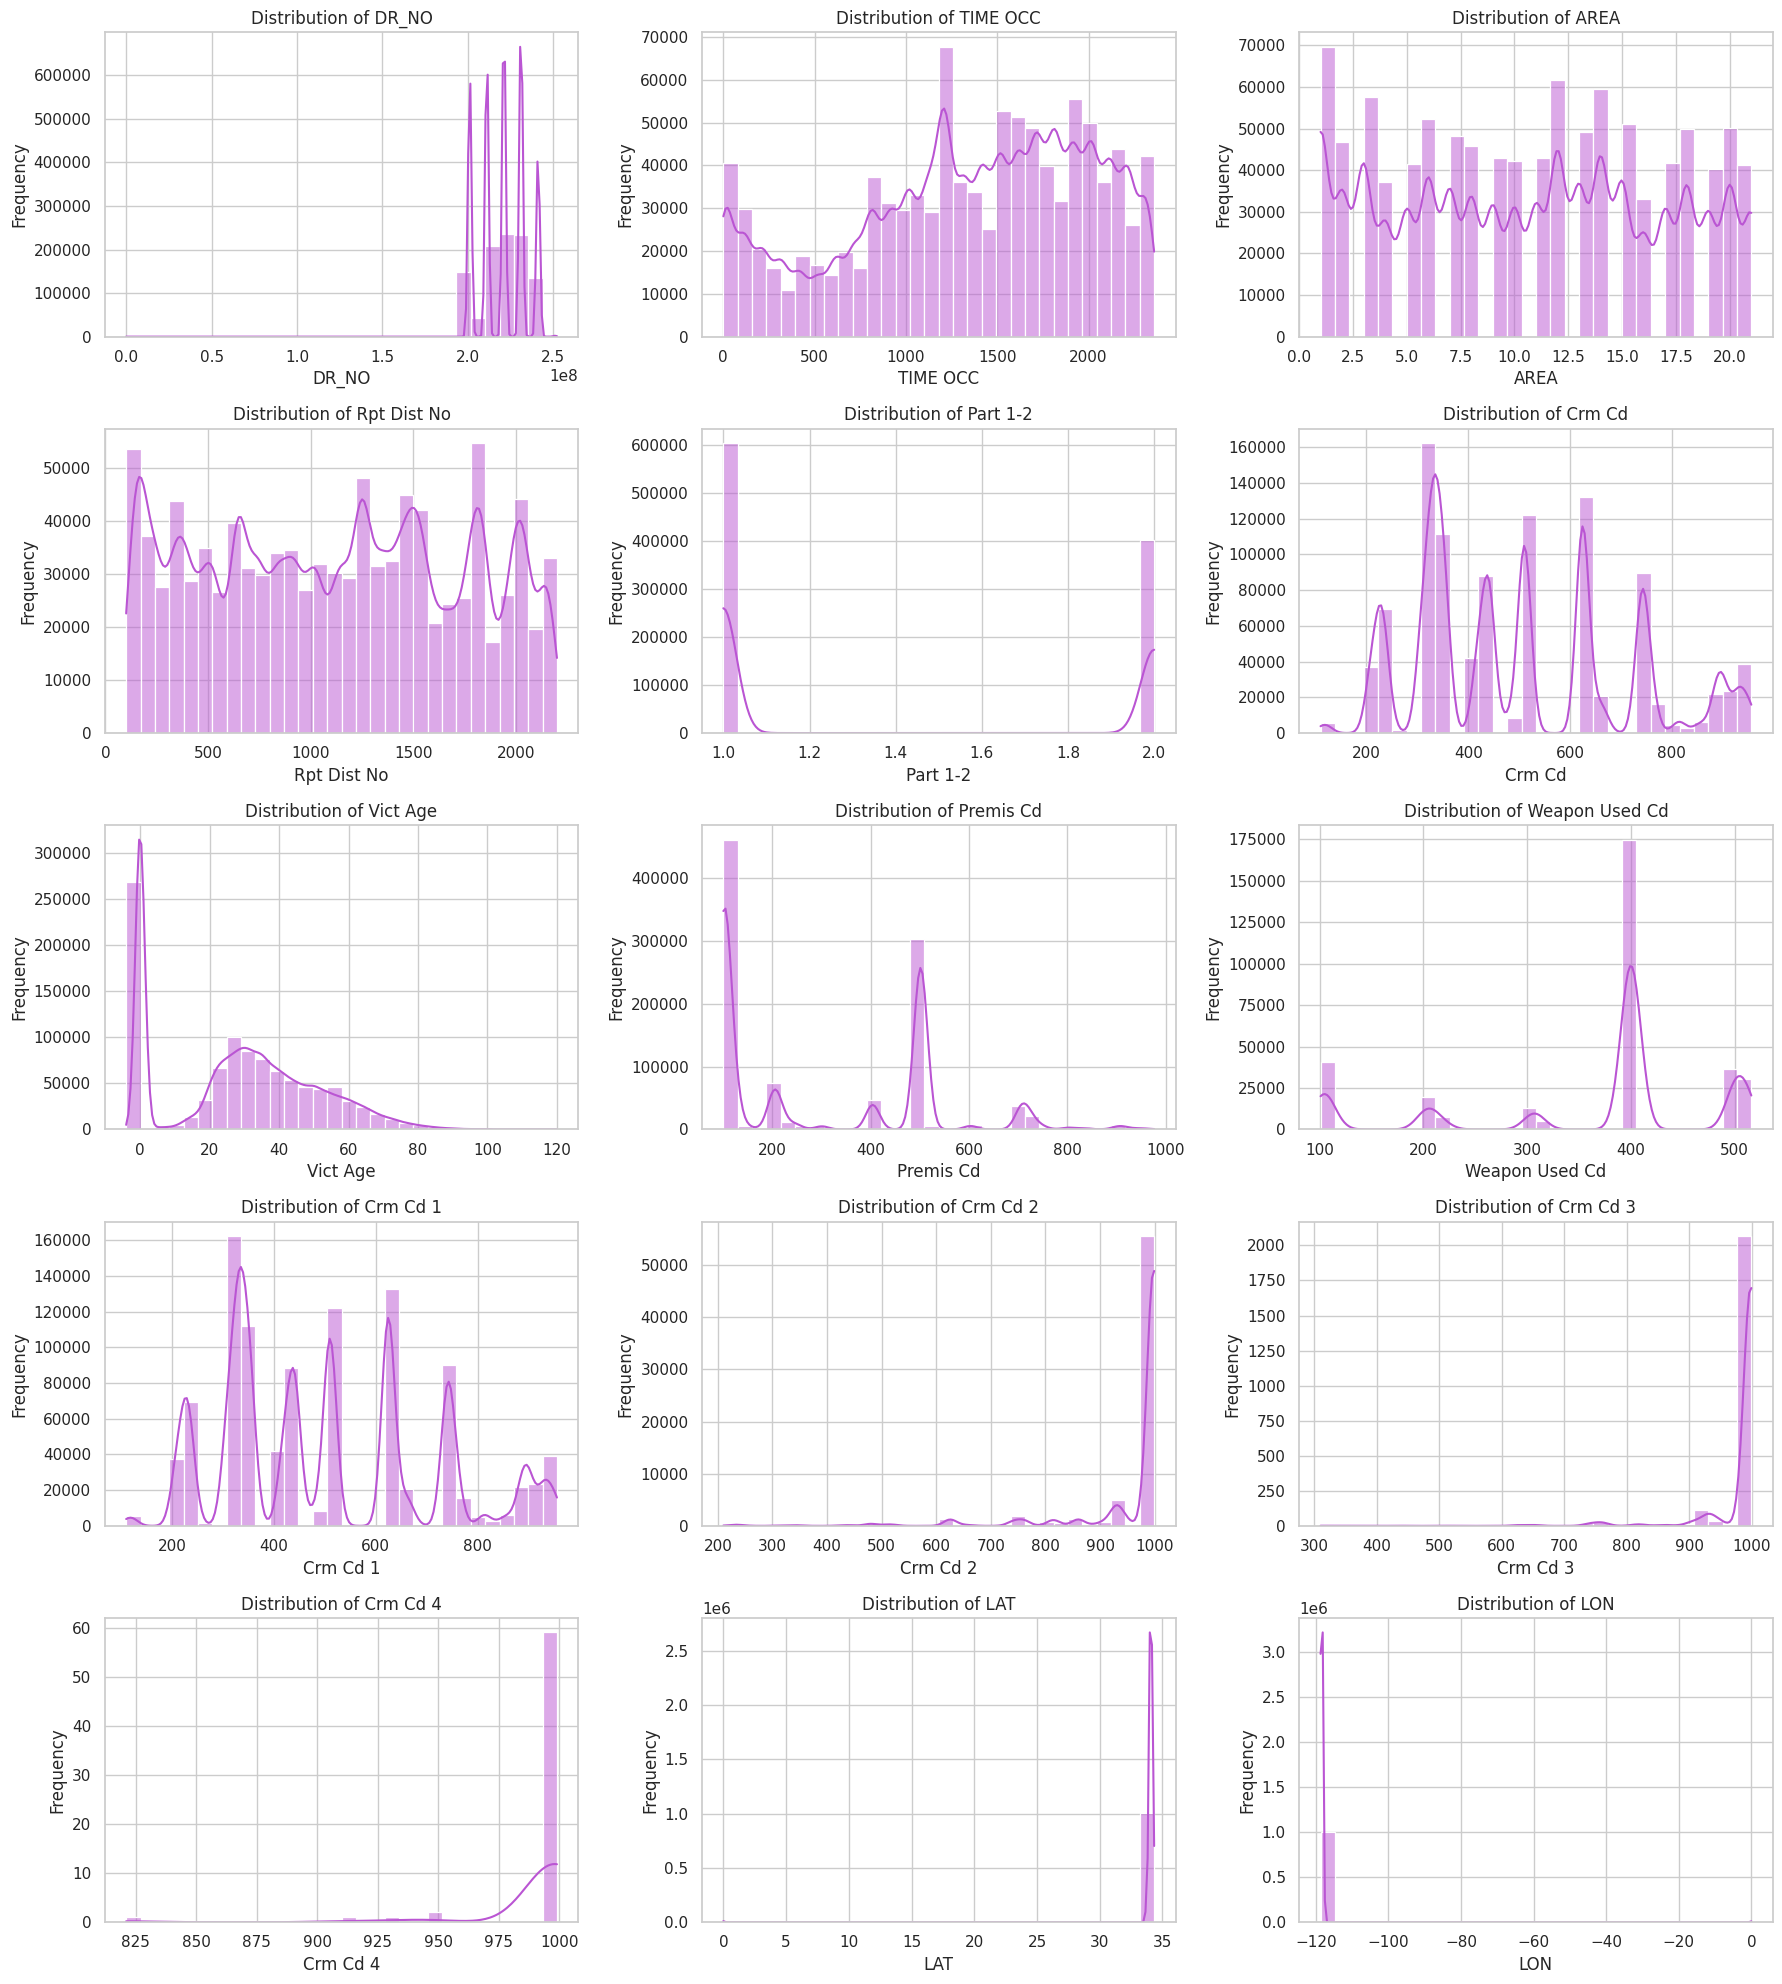

In [ ]:

# Select numerical columns (int and float)
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Plot settings
sns.set(style="whitegrid")
num_plots = len(num_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='mediumorchid', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: >

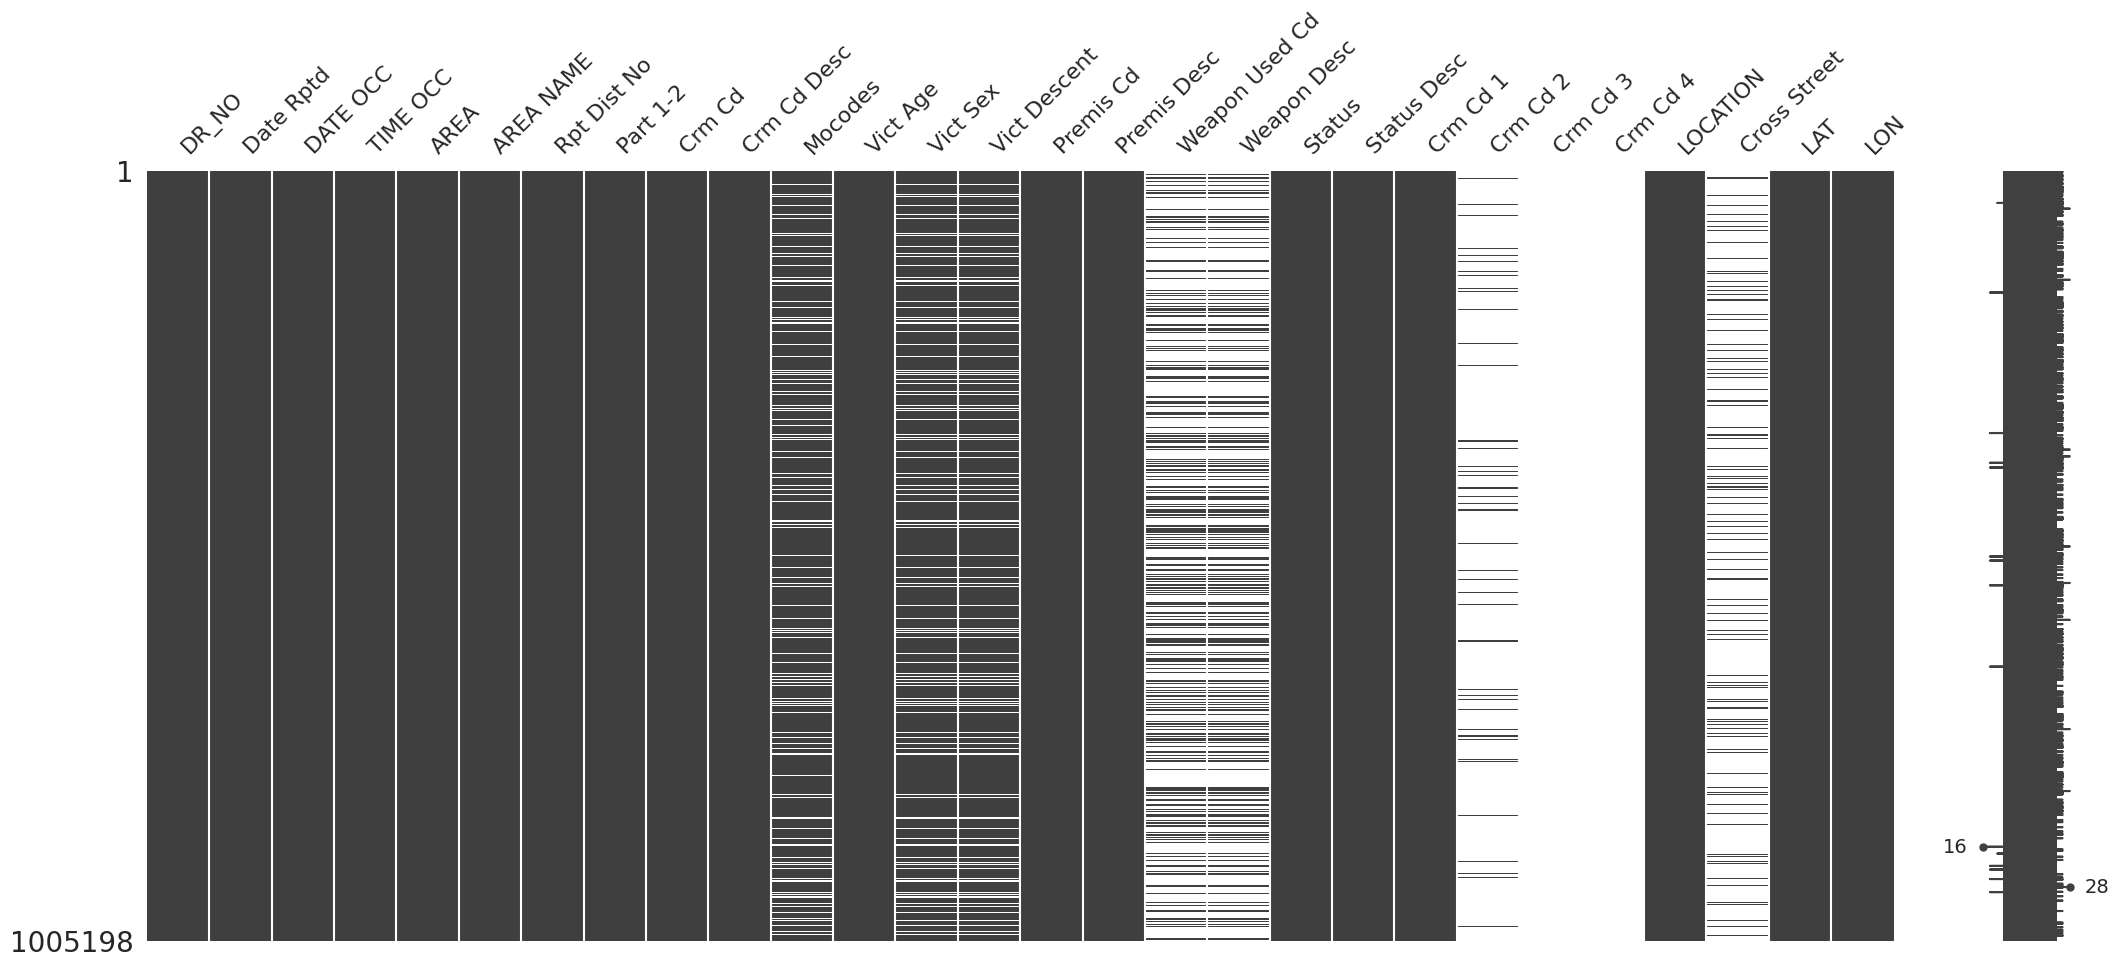

In [ ]:
#using missingno to visualize missing data
msno.matrix(df)

# **Data Cleaning**

In [ ]:
#Describing the Vict Sex column
df['Vict Sex'] = df['Vict Sex'].replace({'F': 'Female', 'M': 'Male', 'H': 'Other', 'X': 'Unknown'})


In [ ]:
# Convert dtype to datetime first (auto-detects and removes time if it's present) for column Date Rptd & DATE OCC
df['Date Rptd'] = pd.to_datetime(df['Date Rptd']).dt.normalize()
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.normalize()



<ipython-input-32-a82e1fb52019>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd']).dt.normalize()
<ipython-input-32-a82e1fb52019>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.normalize()


In [ ]:
# Mapping LAPD AREA codes to their corresponding division names

area_mapping = {
    1: "Central",
    2: "Rampart",
    3: "Southwest",
    4: "Hollenbeck",
    5: "Harbor",
    6: "Hollywood",
    7: "Wilshire",
    8: "West L.A.",
    9: "Van Nuys",
    10: "West Valley",
    11: "Northeast",
    12: "77th Street",
    13: "Newton",
    14: "Pacific",
    15: "North Hollywood",
    16: "Foothill",
    17: "Devonshire",
    18: "Southeast",
    19: "Mission",
    20: "Olympic",
    21: "Topanga"
}

# Replace values in the 'AREA' column

df['AREA'] = df['AREA'].map(area_mapping)


In [ ]:
# replacing the codes with their desciptions from the LAPD weapon codebook
weapon_mapping = {
    400.0: "Firearm",
    500.0: "Knife or Cutting Instrument",
    511.0: "Blunt Object",
    102.0: "Strong-Arm (hands, fists, feet, etc.)",
    109.0: "Other Weapon",
    200.0: "Fire",
    106.0: "Stick",
    207.0: "Machete",
    512.0: "Unknown Blunt Object",
    307.0: "Screwdriver",
    306.0: "Tool",
    312.0: "Metal Pipe",
    212.0: "Brass Knuckles",
    204.0: "Scissors",
    308.0: "Tire Iron",
    304.0: "Hammer",
    205.0: "Razor",
    114.0: "Bottle",
    201.0: "Explosives",
    302.0: "Ax",
    311.0: "Rock",
    113.0: "Club",
    101.0: "Verbal Threat",
    215.0: "Piece of Glass",
    107.0: "Baton",
    515.0: "Unspecified Object",
    218.0: "Syringe",
    223.0: "Tree Branch",
    219.0: "Board",
    310.0: "Brick",
    301.0: "Ice Pick",
    506.0: "Unknown Sharp Object",
    216.0: "Pen",
    103.0: "Poison",
    305.0: "Wrench",
    513.0: "Piece of Concrete",
    221.0: "Broomstick",
    211.0: "Chain",
    104.0: "Drugs",
    309.0: "Shovel",
    503.0: "Needle",
    206.0: "Chemical",
    303.0: "Hoe",
    501.0: "Broken Glass",
    112.0: "Flashlight",
    514.0: "Screw",
    510.0: "Crowbar",
    217.0: "Chair",
    210.0: "Nunchucks",
    122.0: "Incendiary Device",
    203.0: "Liquids",
    505.0: "Bottle (Thrown)",
    115.0: "Can",
    214.0: "Nail",
    208.0: "Hot Object",
    504.0: "Flammable Liquid",
    110.0: "Table",
    507.0: "Scalding Liquid",
    516.0: "Unspecified Firearm",
    509.0: "Board with Nails",
    111.0: "Piece of Furniture",
    213.0: "Metal Rod",
    202.0: "Gasoline",
    105.0: "Rope",
    108.0: "Firearm Replica",
    502.0: "Wire",
    220.0: "Stick (Tree)",
    209.0: "Chainsaw",
    117.0: "Taser",
    508.0: "Liquid Acid",
    125.0: "Projectile",
    300.0: "Sledgehammer",
    118.0: "Electrical Cord",
    116.0: "Gun Butt",
    120.0: "Mirror",
    121.0: "Lighter",
    119.0: "Laptop",
    124.0: "Unknown Object",
    123.0: "Food Item"
}
# Replace values in the 'Vict Descent' column
df['Weapon Used Cd'] = df['Weapon Used Cd'].map(weapon_mapping)


In [ ]:
# Replace 'Vict Descent' codes with descriptive labels using a mapping dictionary.

# Mapping dictionary
descent_mapping = {
    'H': 'Hispanic',
    'W': 'White',
    'B': 'Black',
    'X': 'Unknown/Other',
    'O': 'Other',
    'A': 'Asian',
    'K': 'Native Hawaiian or Other Pacific Islander',
    'F': 'Filipino',
    'C': 'Chinese',
    'J': 'Japanese',
    'V': 'Vietnamese',
    'I': 'Indian',
    'Z': 'Middle Eastern',
    'P': 'Pacific Islander',
    'U': 'Unknown',
    'D': 'Declined to Answer',
    'L': 'Latino',
    'G': 'Guatemalan',
    'S': 'South American',
    '-': 'Missing/No Data'
}

# Replace values in the 'Vict Descent' column
df['Vict Descent'] = df['Vict Descent'].map(descent_mapping)



In [ ]:
# filling categorical columns with mode
cols = ['Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Weapon Desc']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# dropping columns missing over 80% of data
col_to_drop = ['Crm Cd','Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street','Mocodes']
df.drop(columns=col_to_drop, inplace=True)


<Axes: >

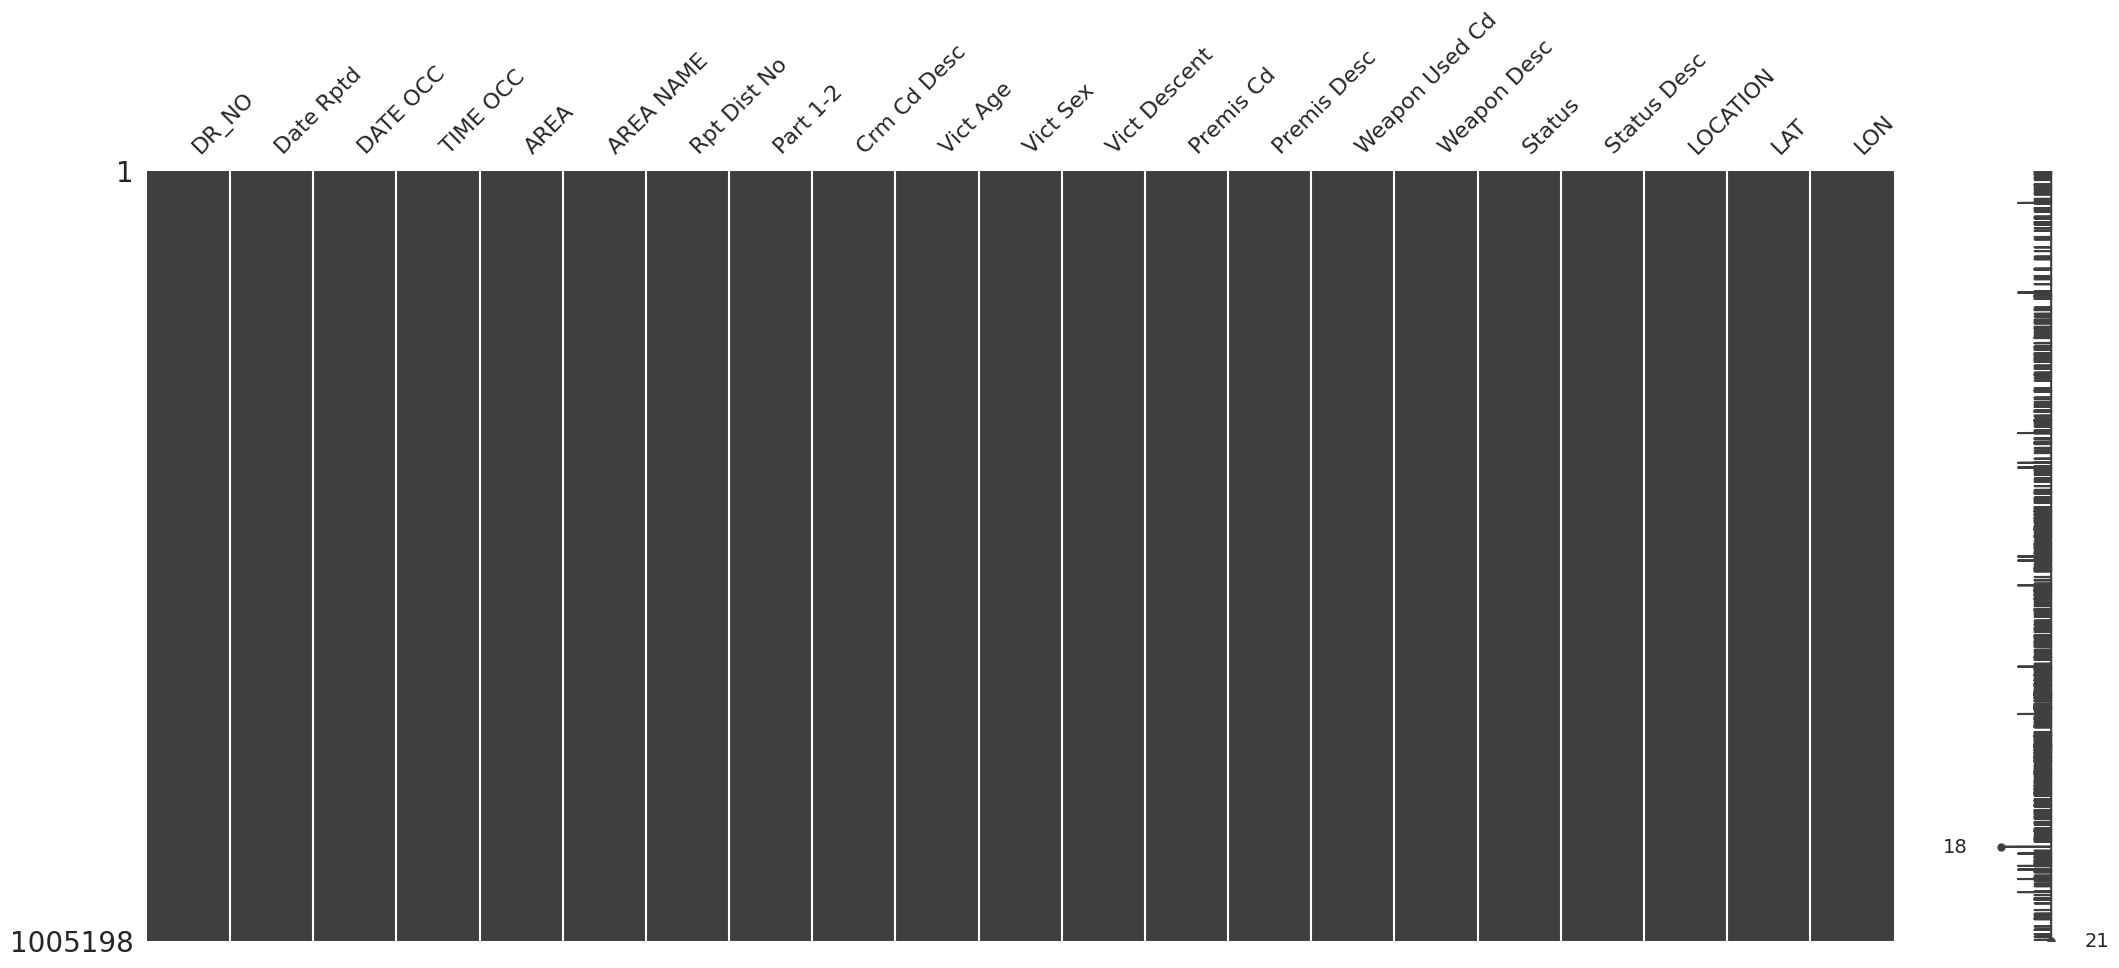

In [ ]:
#using missingno to visualize missing data
msno.matrix(df)

# Saving the Data to csv file

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_crime_data.csv', index=False)


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005198 non-null  int64         
 1   Date Rptd       1005198 non-null  datetime64[ns]
 2   DATE OCC        1005198 non-null  datetime64[ns]
 3   TIME OCC        1005198 non-null  int64         
 4   AREA            1005198 non-null  object        
 5   AREA NAME       1005198 non-null  object        
 6   Rpt Dist No     1005198 non-null  int64         
 7   Part 1-2        1005198 non-null  int64         
 8   Crm Cd Desc     1005198 non-null  object        
 9   Vict Age        1005198 non-null  int64         
 10  Vict Sex        1005198 non-null  object        
 11  Vict Descent    1005198 non-null  object        
 12  Premis Cd       1005182 non-null  float64       
 13  Premis Desc     1004610 non-null  object        
 14  Weapon Used Cd  10